的確な情報を与えてくれる有益な可視化(プロット)をすることは、データ分析において最も重要な作業のひとつになる  
可視化はデータ探索プロセスの一部であり、可視化を行うことで異常値やデータ変形の必要性が認識しやすくなることもあれば、可視化がモデルのアイデアを作り上げるための1つの手段として使えることもある  
あるいは、ウェブ用の対話的な可視化システムの構築が最終目標という人もいるかもしれない  
Pythonには、静的な可視化や動的な可視化を行えるアドオンライブラリがたくさんあるが、ここでは主にMatplotlibやその上に構築されたライブラリを使っていく

Matplotlibは、出版用にも使える品質のプロット(主に2次元)を作成するための、デスクトッププロットパッケージになる  
IPythonシェル(今ではJupyter Notebook)から簡単に対話的なプロットができる  
すべてのOSで様々なGUIバックエンドをサポートしており、さらに可視化したものを、一般的なベクタ画像形式やラスタ画像形式すべて(PDF,SVG,JPG,PNG,BMP,GIFなど)でエクスポートできる  

In [1]:
%matplotlib inline

Jupyter Notebookで対話的なプロット可能を使うには %matplotlib notebook を実行することでできる

# 9.1  Matplotlib APIの概要

In [2]:
import matplotlib.pyplot as plt

Matplotlibを使うには上のようなimport文を使いmatplotlib.pyplotをpltとしてインポートして使う

In [3]:
import numpy as np

In [4]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

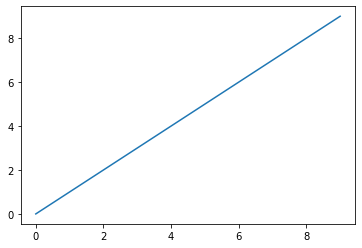

In [5]:
plt.plot(data)

%matplotlib notebookを実行して、NumPyの配列をpltのplot関数に渡すことで描画することができる  
seabornなどのライブラリやpandas組み込みのプロット関数は、プロットする際のちょっとした要望を多くを叶えてくれる  
しかし関数が提供しているオプション以上のカスタマイズをした場合は、Matplotlib APIについて少し学ぶ必要がある

## 9.1.1  図とサブプロット

In [6]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Matplotlibのプロット機能はFigureオブジェクトに含まれている  
新たな図を作成するにはpyplotのfigure関数を使うことで作れる  
IPythoでこれを実行すると空のプロットウィンドウが開かれる  
Jupyterでは%matplotlib notebookを実行していない場合は何も表示されない  
また、figure関数にはたくさんのオプションがあるが、その中の1つのfigsizeを使うことで、図のサイズや縦横比が指定された通りになっていることが保証される

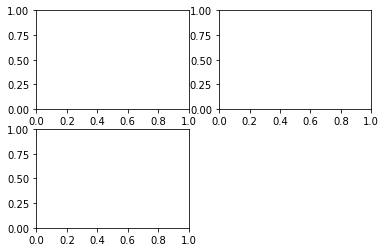

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

figureオブジェクトのadd_subplotメソッドを使ってサブプロット(グラフを描く領域のひとつ)を作ることができ、それを使ってプロットをすることができる  
返ってくるのはAxesSubplotオブジェクトになる  
add_subplotメソッドに渡しているのは、図のレイアウトの横と縦の比率と、その図の番号(1から振られる)を渡している  
上では、2×2のレイアウトで1～3番の番号をそれぞれ振っている

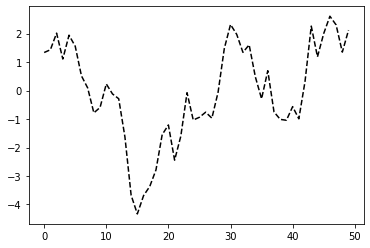

In [8]:
plt.plot(np.random.randn(50).cumsum(), "k--")

%matplotlib notebookの実行化でplt.plot(配列など)のようなプロットコマンドを発行すると、Matplotlibは使用した図やサブプロットの中で最後のものに描画する  
つまり、その前に作成した図やサブプロットを隠してしまう  
"k--"は線種指定オプションで、Matplotlibに黒色の破線でプロットさせている  

In [9]:
_ = ax1.hist(np.random.randn(100), bins=20, color="k", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

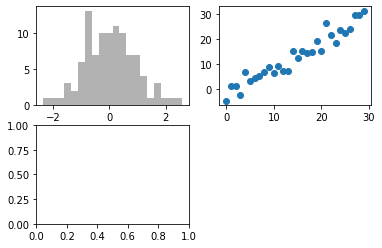

In [10]:
fig

個別のサブプロットに直接プロットするには、AxesSubplotオブジェクトのインスタントメソッド(histやscatterなど)を使って図形を描画するための情報を渡すことでできる

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251F40097C8>,
      dtype=object)

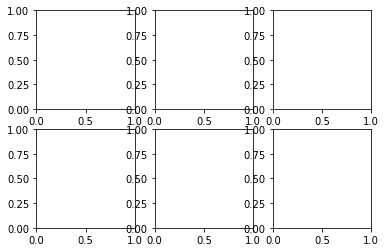

In [11]:
fig, axes = plt.subplots(2, 3)
axes

サブプロットを格子状に配置した図を作成することはよくあることで、これを簡単に行うためのplt.subplots関数がある  
この関数は新たな図を作成し、その中にAxesSubplotオブジェクトを作成した上で、それらのAxesSubplotオブジェクトを要素として持つNumPyの配列を返してくれる

plt.subplots関数の便利な点は、軸の配列axesに対して、2次元配列のようなインデックスを簡単に付けられるところにある(例えばaxes[0, 1]のように指定できる)  
また、sharexとshareyを用いて、すべてのサブプロットに同じX軸とY軸を設定することができる  
このオプションは、同じスケールでデータを比較するときに特に有用になる  
指定しない場合、Matplotlibは各サブプロットの値の範囲に応じて表示範囲を個々に自動スケールする  

plt.subplotsのオプション

|引数|説明|
|:-|:-|
|nrows|サブプロットの行の数|
|ncols|サブプロットの列の数|
|sharex|すべてのサブプロットで同じX軸の目盛りを使うよう指定(xlimの変更がすべてのサブプロットに影響)|
|sharey|すべてのサブプロットで同じY軸の目盛りを使うよう指定(ylimの変更がすべてのサブプロットに影響)|
|subplot_kw|各サブプロットを作成するために呼び出されるadd_subplotに渡されるキーワード引数のディクショナリ|
|\*\*fig_kw|subplotsに与える、作図の際に用いる追加のキーワード引数。plt.subplots(2, 2, figsize=(8, 6))など|

### 9.1.1.1  サブプロットのまわりの空白を調整する

Matplotlibを使うと、デフォルトではサブプロットのまわりにかなりの余白ができ、サブプロットの間にもかなりのスペースが空く  
スペースはすべてプロットの高さや幅に対する相対的な比率での指定となっているため、プロットのサイズをプログラムで変えても、GUIウィンドウの手動リサイズで変えても、スペースは動的に調整される  

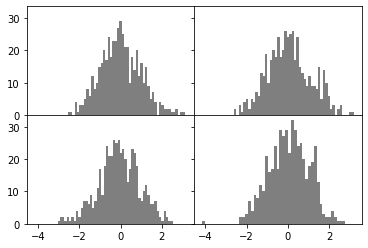

In [12]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color="k", alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

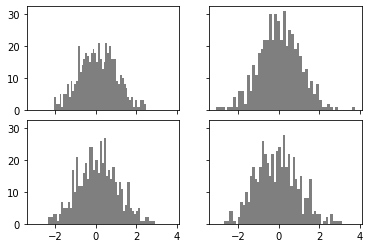

In [13]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color="k", alpha=0.5)
fig.subplots_adjust(wspace=0.2, hspace=0.1)

空白スペースの調整は、Figureオブジェクトのsubplots_adjustメソッドか、pyplotのsubplots_adjust関数として呼び出すことで指示を出すことができる  
サブプロットを作成し、図形を描画した後に、subplots_adjustメソッドか関数として呼び出し、キーワード引数と空白の数値を渡して使う  
渡せるキーワード引数は、top、bottom、left、right、wspace、hspaceになる  
wspaceとhspaceはそれぞれサブプロット間の横と縦の隙間を指定でき、あとの4つのキーワード引数はサブプロット外のスペースを指定できる  
サブプロット同士を近づけると、目盛りの値が他のサブプロットに干渉して見づらくなるので、サブプロットの作成時にキーワード引数のsharexとshareyにTrueを渡して、共通のX軸とY軸を使うようにしている

## 9.1.2  色、マーカー、線種

Matplotlibの主要なplot関数にはX座標とY座標の配列を引数として渡すが、更にオプションで色や線種を指定したり、文字列を用いた簡略表記もできる

In [14]:
x = np.arange(10)
y = x * 2

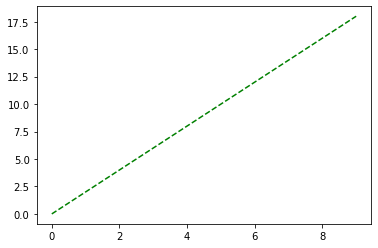

In [15]:
plt.plot(x, y, "g--")

例えば、緑色(g)の破線(--)でxとyをプロットするには"g--"を第三引数として渡すことで線種と色を指定できる  
このような文字列で色や線種を指定する方法は、利便性のために与えられている  
しかし、プログラムでプロットを作成する場合であれば、望みの線種でプロットを作成するために文字列を結合処理しなければならないのは嬉しくない

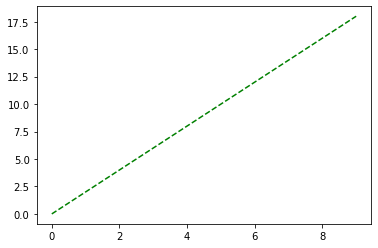

In [16]:
plt.plot(x, y, linestyle="--", color="g")

先程の"g--"の部分は、キーワード引数のlinestyleとcolorにそれぞれ渡すことで明示的に指定することができる

In [17]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

たくさん使われる色には簡略表記が用意されているが、16進数のカラーコード("#CECECEなど")を指定すればスペクトル上のどんな色でも使うことができる  
線種や色の完全な一覧は、pyplotのplot関数のdocstringで参照することができる

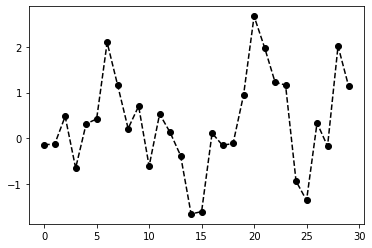

In [18]:
plt.plot(np.random.randn(30).cumsum(), "ko--")

折れ線グラフには、実際のデータポイントを目立たせるためにマーカーを付けることができる  
マーカーの指定は線種指定文字列に含めて"o"などの文字列を入れることでできる  
マーカーを指定する文字列は、線とマーカーの色指定の後にマーカーの種類と線種を続けて書くことでできる

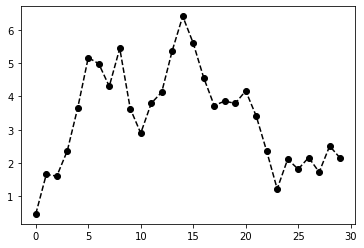

In [19]:
plt.plot(np.random.randn(30).cumsum(), color="k", linestyle="--", marker="o")

マーカーの指定はキーワード引数のmarkerに指定するための文字列を渡すことでできる

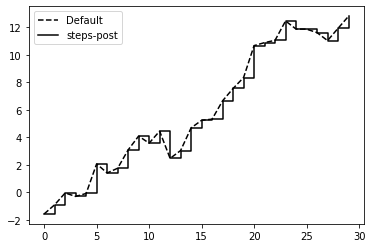

In [20]:
data = np.random.randn(30).cumsum()
plt.plot(data, "k--", label="Default")
plt.plot(data, "k-", drawstyle="steps-post", label="steps-post")
plt.legend(loc="best")

デフォルトでは折れ線グラフの点は直線で結ばれている  
これはキーワード引数のdrawstyleに指定したい文字列("steps-post"など)を渡すことで変更できる  
ちなみにキーワード引数のlabelに文字列を渡すことで、そのグラフに名前を付けることができる  
更に、グラフに付けた名前を使ってpyplotのlegend関数を使うことで、線を識別するための凡例を作ることができる  
legend関数に渡しているlocは凡例を表示する場所を指定するもので、"best"を渡すことで一番ベストだと判断したところ自動的に選んで場所の指定をしてくれる

## 9.1.3  目盛り、ラベル、凡例

大抵のプロットの装飾には、実現できる方法が主に2通りある  
手続き的なpyplotインタフェース(matplotlib.pyplot)を使う方法と、オブジェクト指向なMatplotlibネイティブのAPIを使う方法がある  
pyplotインタフェースは対話的な用途に向いており、xlim、xticks、xticklabelsなどのメソッドからなっている  
これらのメソッドはそれぞれ、プロットする範囲、目盛りの位置、目盛りのラベルを調整するもので、使い方は以下の2つがある  
- 引数を与えずに呼び出すと、パラメータの現在の値が返ってくる  
(例えばplt.xlim()は現在のX軸のプロット範囲を返す)  
- 値を引数として与えて呼び出すと、パラメータに値を設定する  
(例えばplt.xlim([0, 10])とすると、X軸の範囲を0から10に設定できる)  

このようなメソッドはすべて、アクティブなAxesSubplotか、一番最後に作られたAxesSubplotに対して作用する  

各メソッドが対応するサブプロットオブジェクト本体のメソッドは2つある  
例えばxlimの場合、対応するメソッドはax.get_xlimとax.set_xlimのようになる  
コードが明確になる(特にサブプロットを扱う際に対象を明示できる)というメリットがある

### 9.1.3.1  タイトル、軸のラベル、目盛り、目盛りのラベルを設定する

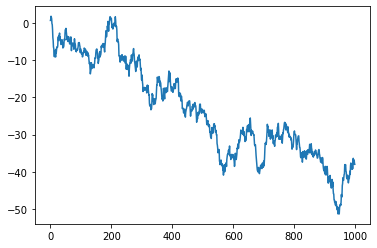

In [21]:
data = np.random.randn(1000).cumsum()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data)

上がデフォルトの図になる  

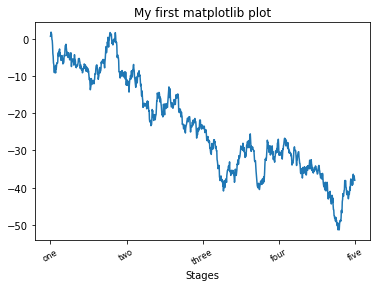

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize="small")
xname = ax.set_xlabel("Stages")
title = ax.set_title("My first matplotlib plot")
ax.plot(data)

X軸の目盛りを変更するには、set_xticksとset_xticklabelsメソッドを使うのが簡単な方法になる  
set_xtickメソッドに数値の配列を渡すことで、データ範囲のどこに目盛りを入れるかを指示できる  
デフォルトでは、目盛りと同じ値がラベルとして表示される  
軸のラベルを変更するには、set_xticklabelsメソッドを使って、目盛りの数のリストを渡すことで変更できる  
一緒に渡している、キーワード引数のrotationは目盛りのラベルを指定した角度に回転させて、キーワード引数のfontsizeは文字のフォントサイズを変更できる  
サブプロット(図)にはタイトルを付けることができ、set_titleメソッドに設定したい名前を渡すことでできる  
また、X軸にも名前を付けることができ、set_xlabelメソッドに付けたいラベル名を渡すことでできる

上はすべてX軸に対する変更だが、メソッドのx部分をyにすることでY軸を変更することができる

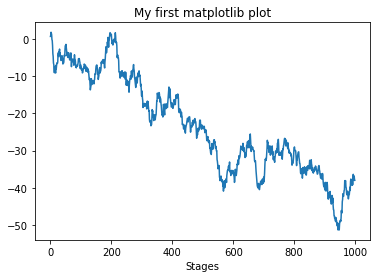

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
props = {
    "title": "My first matplotlib plot",
    "xlabel": "Stages"
}
ax.set(**props)
ax.plot(data)

また、AxesSubplotオブジェクトにはsetメソッドもあり、ディクショナリで上のメソッド名を文字列としたキーと、そのメソッドに渡したい文字列を渡すことでまとめて設定することもできる

### 9.1.3.2  凡例の追加

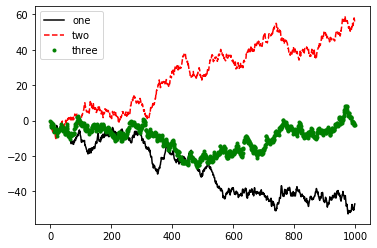

In [24]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), "k", label="one")
ax.plot(np.random.randn(1000).cumsum(), "r--", label="two")
ax.plot(np.random.randn(1000).cumsum(), "g.", label="three")
ax.legend(loc="best")

凡例をプロットに追加する方法はいくつかあるが、最も簡単なのはplotメソッドのキーワード引数のlabelに設定したい名前を渡して、グラフのひとつずつに名前を付け、AxesSubplotオブジェクトのlegendメソッドかpyplotのlegend関数のどちらかを呼び出すことで凡例を表示できる  
legendメソッドのキーワード引数のloc引数は表示する位置を指定することができ、"best"を渡して表示している

In [25]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label st

legendのloc引数に渡せる文字列はbest以外にもあり、plt.legendのdocstringに一覧が書かれている  
基本はbestを指定すれば邪魔にならないような場所を選んで表示してくれる  
なお、凡例から一部のデータを取り除くには、ラベル名を指定しないか、明示的にlabel="\_nolegend\_"を指定することでできる

## 9.1.4  サブプロットへの注釈や描画

標準な形でのプロットに加えて、テキストや矢印、その他のさまざまな形状の独自の注釈をプロットに付けたいことがある  
注釈やテキストは、text、arrow、annotateといった関数を用いることでプロットに追加できる

In [26]:
x = np.arange(10)
y = x * 2

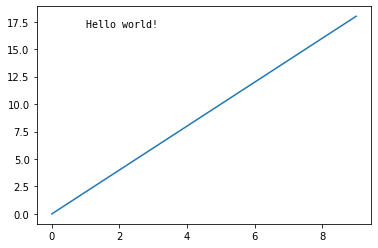

In [27]:
plt.text(1, 17, "Hello world!", family="monospace", fontsize=10)
plt.plot(x, y)

pyplotのtext関数やAxesSubplotオブジェクトのtextメソッドを使うことでプロット上にテキストを追加することができる  
textに渡すのは、テキストを追加するX座標(第一引数)とY座標(第二引数)、テキストの内容(第三引数)の3つになる  
また、キーワード引数のfamilyにフォント名を渡すことでフォントの種類を、キーワード引数のfontsizeに数値を渡すことでフォントサイズをそれぞれ指定することができる

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

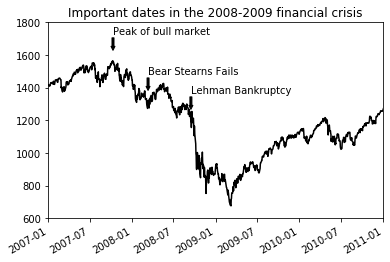

In [28]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# index_colで最初の列を行インデックスに指定、parse_datesで行インデックスをDatetime型に変換
data = pd.read_csv(r'.\download_file\examples\spx.csv', index_col=0, parse_dates=True) 
spx = data['SPX'] # データフレームのSPX列を選択してシリーズに変換

spx.plot(ax=ax, style='k-') # シリーズオブジェクトのplotメソッドで描画

# 日付をキーとして、値に注釈を入れたディクショナリ
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

# 注釈を図に入れる
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75), # asofメソッドは渡されたインデックスまでの最新の値を返す、+75で高さ調整
                xytext=(date, spx.asof(date) + 225), # +225で高さ調整
                arrowprops=dict(facecolor='black', headwidth=4, width=2, # 矢印の詳細
                                headlength=4),
                horizontalalignment='left', verticalalignment='top') # テキストの位置

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011']) # X軸の描画範囲指定
ax.set_ylim([600, 1800]) # Y軸の描画範囲指定

ax.set_title('Important dates in the 2008-2009 financial crisis') # タイトル

AxesSubplotのannotateメソッドを使うことで注釈をつけることができる  
上の場合、矢印とその時点で起きた事象を載せている  
annotateメソッドに渡すのは、注釈の内容(第一引数)、キーワード引数のxyに矢印の先端の座標のタプル、キーワード引数のxytextに注釈の文の位置、キーワード引数のarrowpropsに矢印の色やサイズの設定などを渡している

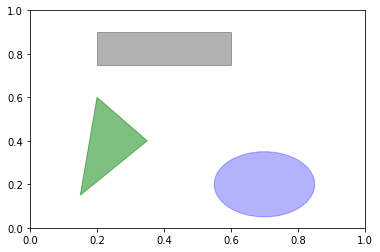

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="k", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="b", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color="g", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [30]:
type(pgon)

matplotlib.patches.Polygon

Matplotlibで図形を表す場合はパッチオブジェクトを使うことでできる  
一部の図形(Rectangle長方形やCircle円など)はpyplotモジュールに含まれているが、それ以外の図形を扱う場合はmatplotlibのpatchesモジュールに含まれている  
パッチオブジェクトを作るにはpyplotのRectagle関数、Circle関数、Polygon関数などを使うことで作成できる  
上ではRectangle関数には図形の左下の位置、横幅の長さ、縦幅の長さを渡して長方形のパッチオブジェクトを作成  
Circle関数には図形の中心の位置、半径の長さを渡して円のパッチオブジェクトを作成  
Polygon関数には図形の角のxy位置をリストとしたリストを渡して多角形のオブジェクトを作成  
それぞれ作成したパッチオブジェクトをAxesオブジェクトのadd_patchメソッドに渡すことで描画できる

## 9.1.5  プロットのファイルへの保存

In [31]:
fig.savefig(r".\pydata\figpath.svg")

アクティブな図(最後に作成されたプロットコマンドが作用する図のこと)はpyplotのsavefig関数にファイルのパスを渡すことで、ファイルパスの拡張子で図を保存できる  
また、上のようにFirureオブジェクトのsavefigメソッドを使うことでも保存することができる

In [32]:
fig.savefig(r".\pydata\figpath.png", dpi=400, bbox_inchies="tight")

savefig関数やメソッドにはキーワード引数でオプションを指定することができる  

savefigのオプション  

|引数|説明|
|:-|:-|
|fname|ファイルのパスを含む文字列か、Pythonのファイル系オブジェクト。ファイル形式はファイルの拡張子から推測される|
|dpi|1インチ当たりのドット数での、図の解像度。デフォルトは100だが、設定によりデフォルト値を変更できる|
|facecolor, edgecolor|図のサブプロット外側の背景色。デフォルトは"w"で白|
|format|使用するファイル形式の明示的な指定(png,pdf,svg,ps,epsなど)|
|bbox_inches|図の中の保存する部分の指定。"tight"を指定した場合は、図のまわりの空白領域を取り除く|

In [33]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

savefig関数やメソッドで保存できるのは、ディスクに書き出したい場合だけではなく、BytesIOなどのファイル系オブジェクトにも書き出すことができる

## 9.1.6  Matplotlibの設定

Matplotlibのカラースキームやデフォルト値の設定は、主に図の出版にできした形になるように調整されている  
図の大きさやサブプロットのスペース、色、フォントサイズ、グリッドスタイルなど、ほとんどのデフォルトの振る舞いは、それらを制御するたくさんのグローバルパラメータでカスタマイズが可能である  
Pythonのプログラム内から設定を変更する方法としては、rc関数を使う方法がある  

In [34]:
plt.rc("figure", figsize=(10, 10))

上のように、rc関数の第一引数にカスタマイズしたいコンポーネントで、figure(図)、axes(軸)、xtick(X軸の目盛り)、ytick(Y軸の目盛り)、grid(グリッド)、legend(凡例)などを文字列として渡すことで設定できる  
そのあとの第二引数以降に設定したいパラメータをキーワード引数で指定していく  

In [35]:
font_options = {"family": "monospace",
                "weight": "bold",
                "size": 12}
plt.rc("font", **font_options)

[]

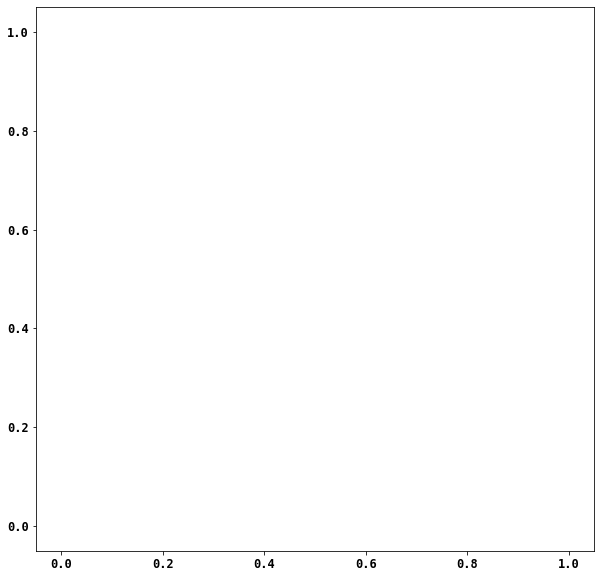

In [36]:
plt.plot()

オプションを設定するにはディクショナリで渡すのが簡単  

もっと大規模にカスタマイズしたい場合や、すべてのオプションの一覧を見たい場合は、matplotlib/mpl-dataディレクトリのmatplotlibrcという設定ファイルがあり、そのファイルをカスタマイズして.matplotlibrcという名前でホームディレクトリに置くことでMatplotlibを使う際に自動的にこのファイルをロードして設定してくれるようになる

# 9.2  pandasとseabornのプロット関数

Matplotlibはかなり低レベルのツールで、データの表示(折れ線グラフ、棒グラフ、箱ひげ図など)、凡例、タイトル、目盛りのラベル、注釈といった基本コンポーネントからプロットを組み立てている  
一方pandasでは、複数行のデータに、行ラベルや列のラベルが付いている  
pandasでは本体にデータフレームやシリーズのオブジェクトから簡単に可視化できるようにする標準メソッドがある  
そのようなもう一つのライブラリとして、Michael Waskonが作成した統計用グラフィックライブラリのseabornがある  
seabornを使うと、よく使われる可視化を簡単に行うことができる

## 9.2.1  折れ線グラフ

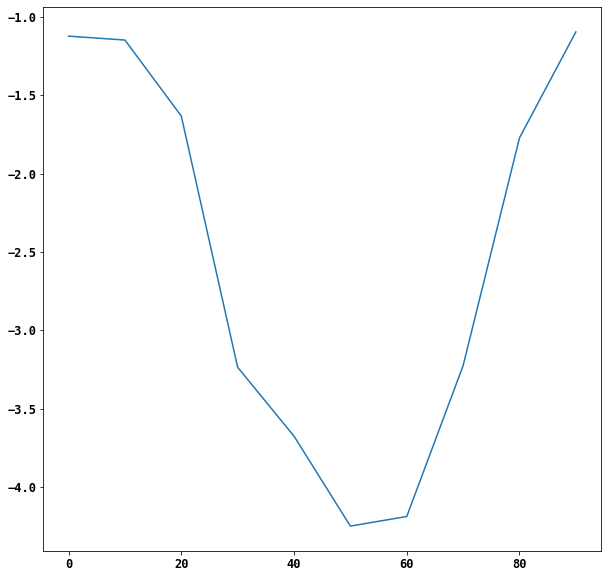

In [37]:
import pandas as pd
import numpy as np
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

シリーズやデータフレームにはそれぞれ、いくつかの基本的な形式のプロットをするためのplotメソッドがある  
デフォルトではplot関数は折れ線グラフをプロットする

シリーズオブジェクトのインデックスがMatplotlibに渡されてX軸にプロットされているが、use_index=Falseを渡すことで無効化することもできる  
X軸の目盛りと範囲はキーワード引数のxticksとxlimで調整でき、Y軸もyticksとylimで調整することができる  
pandasのプロット用メソッドの大半は、オプションでaxを指定することでMatplotlibのサブプロットオブジェクトを指定できる  
Seiries.plotメソッドの引数

|引数|説明|
|:-|:-|
|label|プロットの凡例に表示するラベル|
|ax|プロットするMatplotlibのサブプロットオブジェクト。何も指定しなければアクティブなサブプロットを使う|
|style|Matplotlibに渡される"ko--"などの線種指定文字列|
|alpha|プロットの不透明度(0から1までの値で指定)|
|kind|"area","bar","barh","density","hist","kde","line","pie"のいずれかを指定できる|
|logy|Y軸にログスケールを使う|
|use_index|目盛りのラベルにオブジェクトのインデックスを使う|
|rot|目盛りのラベルの回転角(0から360までの値で指定)|
|xticks|X軸の目盛りの使う値|
|yticks|Y軸の目盛りに使う値|
|xlim|X軸の範囲|
|ylim|Y軸の範囲|
|grid|軸のグリッドを表示する|

In [38]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), 
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.746256,1.024866,0.477063,-0.048422
10,0.147968,0.509056,0.928977,-2.428652
20,3.126524,1.514496,1.979331,-2.673006
30,4.160715,1.502879,2.051209,-1.861191
40,3.433275,1.748294,3.108253,-2.815884
50,3.490045,1.629713,3.433298,-3.106941
60,2.698907,2.283910,2.578635,-4.177821
70,2.711645,1.219882,1.167562,-4.402955
80,3.743604,0.460639,2.340655,-3.680343
90,3.769576,0.717318,1.640249,-3.886179


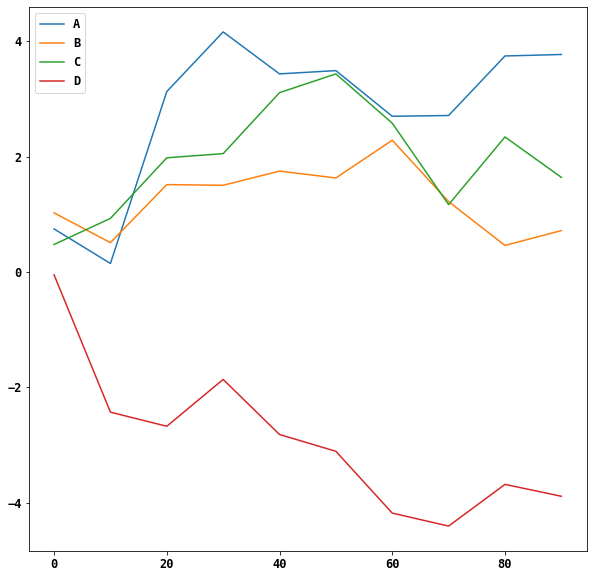

In [39]:
df.plot()

データフレームのplotメソッドは、1つのサブプロット上に各列を異なる折れ線グラフでプロットし、凡例を自動生成する  
DataFrame.plotのみに指定できる引数  

|引数|説明|
|:-|:-|
|subplots|データフレームの各列を別々のサブプロットにプロットする|
|sharex|subplots=trueの場合、サブプロット間でX軸を共有し、X軸の目盛りや範囲を関連付ける|
|sharey|subplots=Trueの場合、サブプロット間でY軸を共有し、Y軸の目盛りや範囲を関連付ける|
|figsize|作成するFigureのサイズ。2つの数値からなるタプルで指定する|
|title|プロットのタイトル。文字列で指定する|
|legend|サブプロットに凡例を付ける(デフォルトはTrue)|
|sort_columns|列をアルファベット順でプロットする。デフォルトではデータフレームの列と同じ順でプロットする|

plot属性にはさまざまな形式用のメソッドが含まれている  
たとえばdf.plot()の折れ線グラフはdf.plot.line()と同じものになる  

## 9.2.2  棒グラフ

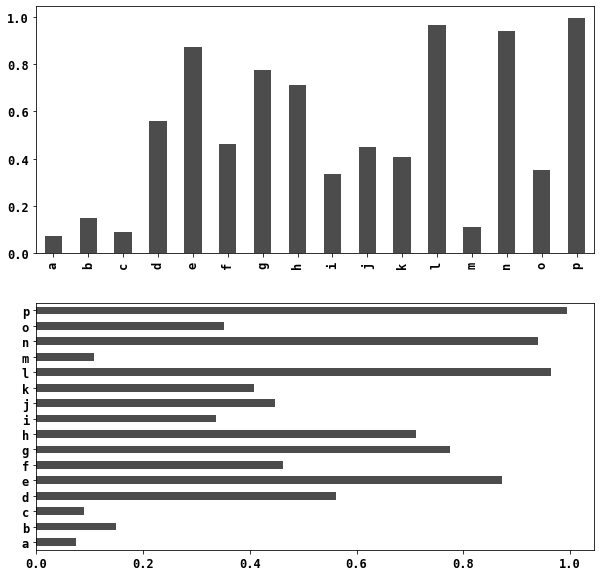

In [40]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="k", alpha=0.7)
data.plot.barh(ax=axes[1], color="k", alpha=0.7)

plot.barとplot.barhを使うとそれぞれの縦棒と横棒の棒グラフを描くことができる  
この場合、シリーズやデータフレームのインデックスは、X軸(bar)やY軸(barh)の目盛りとして使われる

In [41]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.244573,0.229707,0.106277,0.909365
two,0.773590,0.928451,0.231373,0.455550
three,0.740572,0.991370,0.124411,0.797501
four,0.904586,0.606896,0.136238,0.905707
five,0.883130,0.307540,0.947651,0.902077
six,0.070591,0.255620,0.879602,0.789232


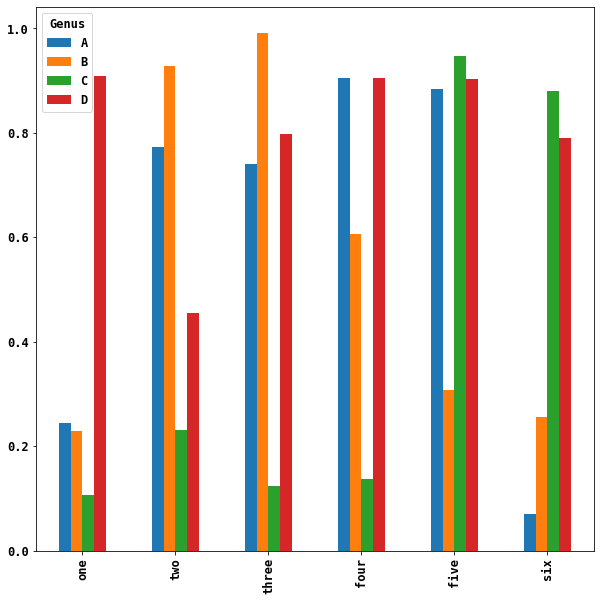

In [42]:
df.plot.bar()

データフレームに付けた列名が、凡例のタイトルとして使われる  

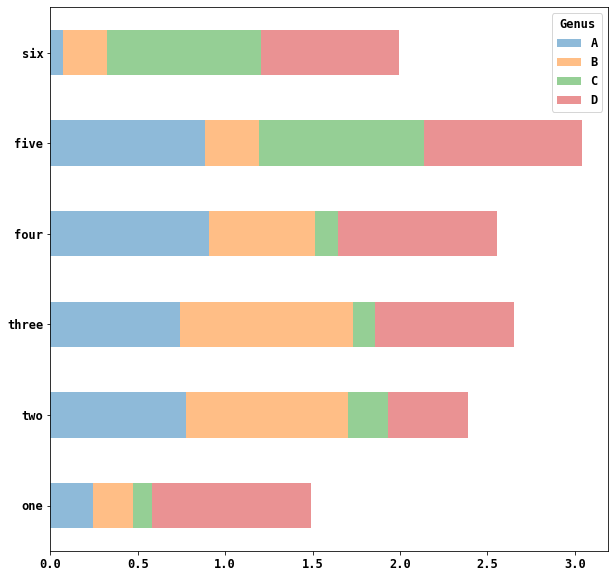

In [43]:
df.plot.barh(stacked=True, alpha=0.5)

積み上げの棒グラフは、bar,barhメソッドに対してstacked=Trueを与えることでできる

In [44]:
tips = pd.read_csv(r".\download_file\examples\tips.csv") # csvファイルからデータを入手
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [45]:
party_counts = pd.crosstab(tips["day"], tips["size"]) # dayとsizeの列の出現頻度を合計した新しいデータフレームを作成
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [46]:
party_counts = party_counts.loc[:, 2:5] # 1と6の列を削除
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [47]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0) # day(行)の数値を合計したもので行ごとに割り、sizeごとの占める割合をデータフレームにする
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


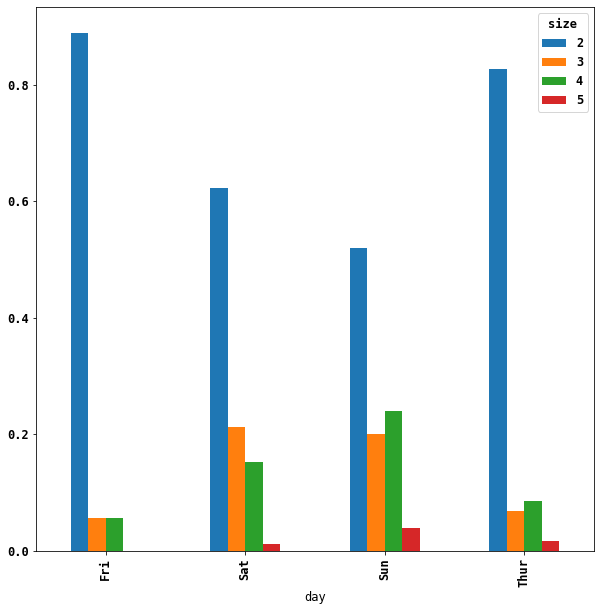

In [48]:
party_pcts.plot.bar()

グラフを見ると土曜(sat)と日曜(sun)に3以上の数が増えていることがわかる  
このようなプロットの前に集計や要約を必要とするデータについては、seabornパッケージを使用するとシンプルに可視化できる

In [49]:
import seaborn as sns

In [50]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


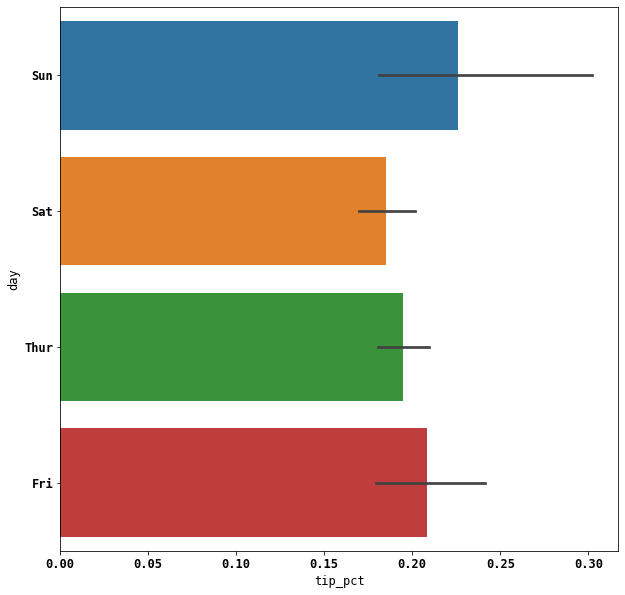

In [51]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

seabornのplot関数にはキーワード引数のdataがあり、そこにpandasのデータフレームを渡すことができる  
キーワード引数のxとyには、データフレームの列の名前を指定する  
上ではX軸にtip_pct列とY軸にはday列を指定してプロットしている  
それぞれの棒はX軸のY軸に対する平均値で、黒く細い棒は95%の信頼区間を表している(オプションで設定できる)

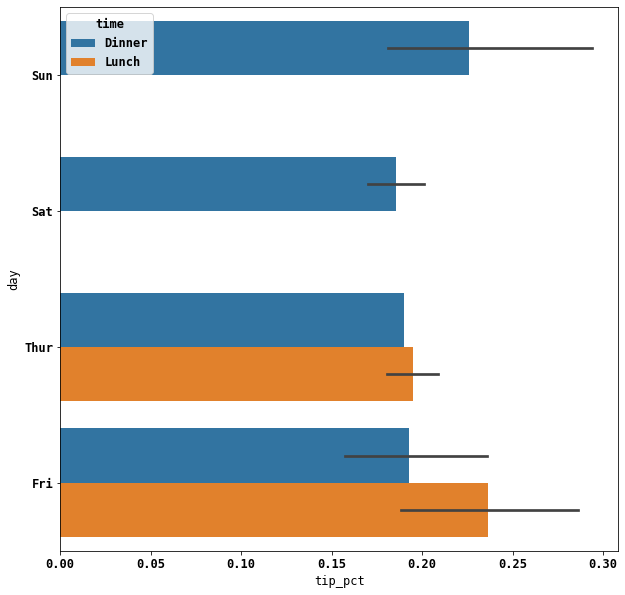

In [52]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

searbornのbarplot関数にはhueというキーワード引数があり、カテゴリ型のデータをもつ列を指定すると、カテゴリごとに分けて集計することができる

In [53]:
sns.set(style="whitegrid")

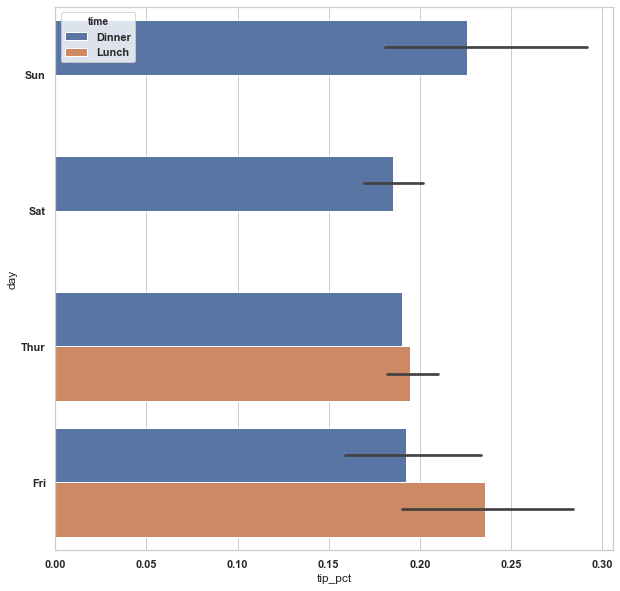

In [54]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

serbornはプロットの見た目のデフォルトを図に合わせて自動で変更して描画する  
seabornのset関数を使ってキーワード引数のstyleに文字列を渡すことで見た目を明示的に指定することができる

## 9.2.3  ヒストグラムと密度プロット

ヒストグラムは棒グラフの一種で、値の頻度を離散データとして表示する  
各データポイントは等間隔に置かれた個々のビンに分けられて入れられ、各ビンの中のデータポイントの数がプロットされる

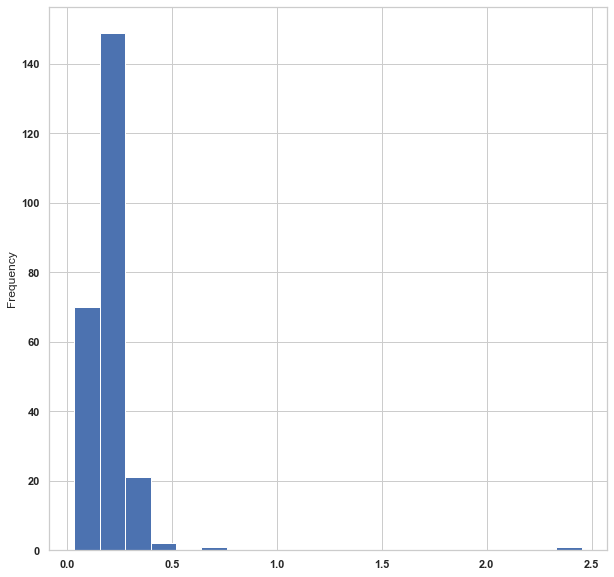

In [55]:
tips["tip_pct"].plot.hist(bins=20)

シリーズオブジェクトのplot.histメソッドで描画し、キーワード引数のbinsに分割する数を指定

関連するプロット形式として密度プロットがあり、実際に観測されたデータを生み出したと推定される連続確立分布の計算から作られる  
通常は、この確率分布をカーネルという正規分布などのシンプルな分布の和として近似するという方法をとる  
そのため、密度プロットはカーネル密度推定(KDE)プロットとも呼ばれる  

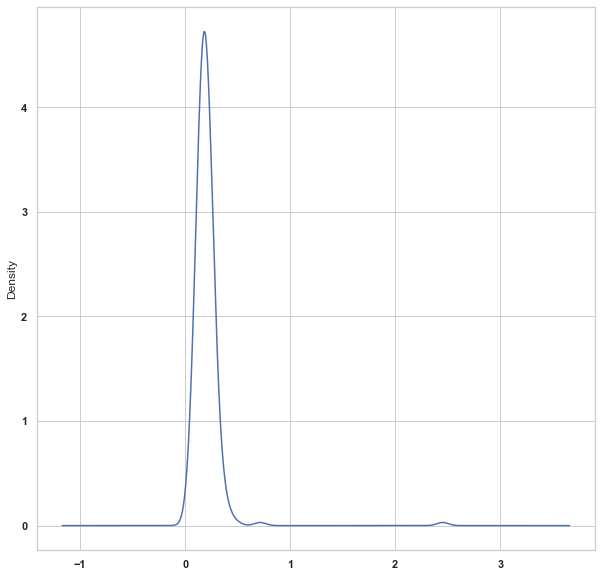

In [56]:
tips["tip_pct"].plot.density()

シリーズオブジェクトにplot.densityメソッドを使うことで、一般的な混合正規分布カーネル密度推定を用いた密度プロットを作成できる

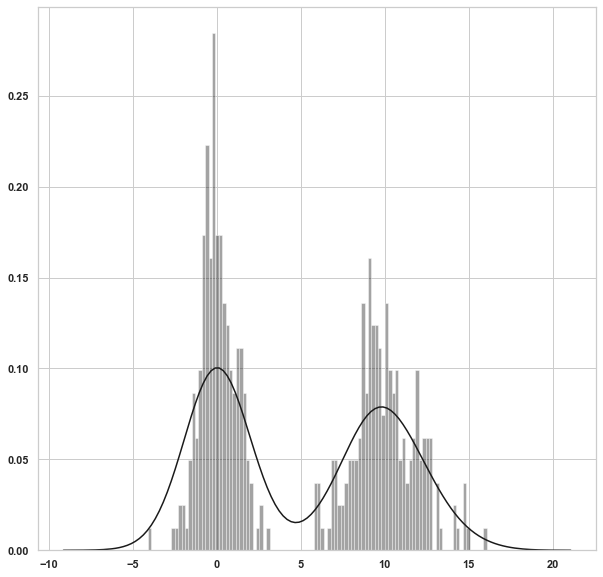

In [57]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2])) # シリーズ同志を結合
sns.distplot(values, bins=100, color="k")

seabornには、ヒストグラムや密度プロットをもっと簡単に作れるdistplot関数があり、ヒストグラムと連続型の密度推定の両方のプロットを同時に作成することができる

## 9.2.4  散布図

散布図は2つの1次元データの間の相関を調べるのに有効な場合がある

In [58]:
macro = pd.read_csv(r".\download_file\examples\macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna() # eを底とする対数を出し上の行との差を計算、一番上の行が欠損値になるので除去
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Change in log m1 versus log unemp')

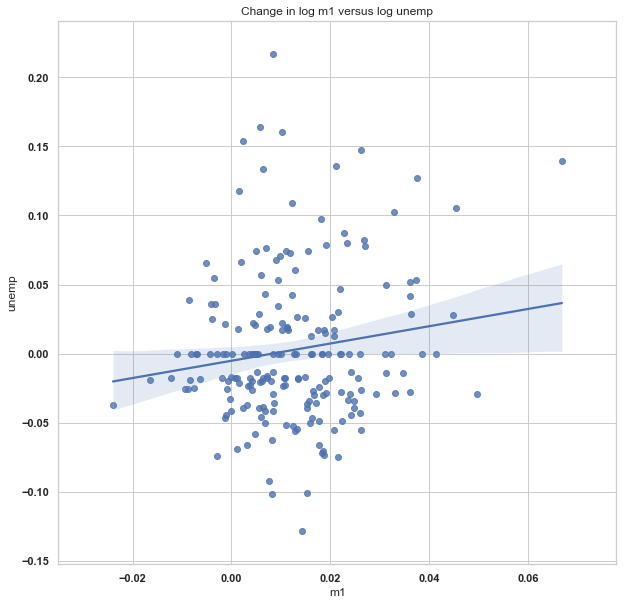

In [59]:
sns.regplot("m1", "unemp", data=trans_data)
plt.title("Change in log %s versus log %s" % ("m1", "unemp"))

seabornのregplot関数にX軸にしたいデータの列とY軸にしたいデータの列を渡し、キーワード引数のdataに使用するデータフレームオブジェクトを渡すことで、散布図を作成し、線形回帰により回帰直線を当てはめる

探索的データ分析では一連の変数のすべてのペアについて散布図を求められると便利で、このような図は、ペアプロットや散布図行列と呼ばれる

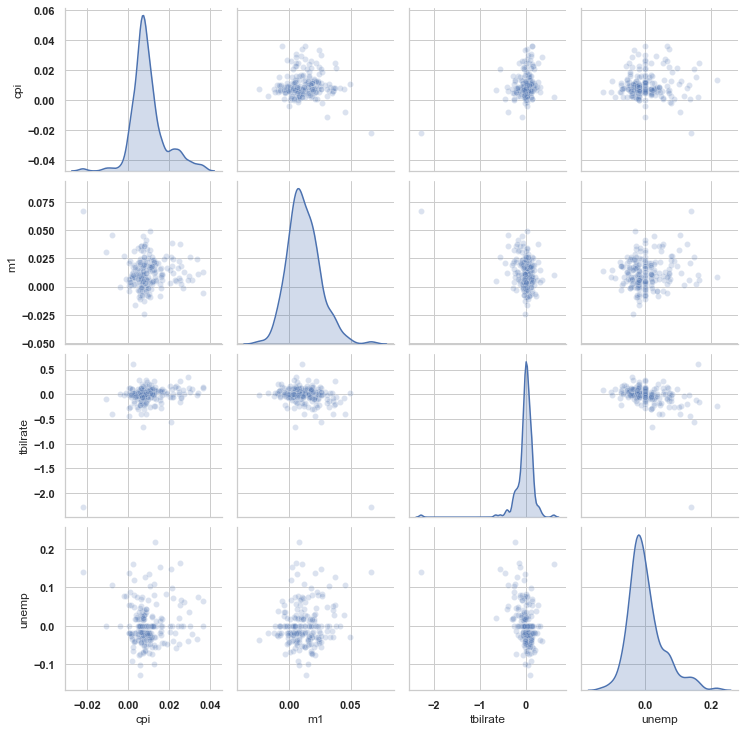

In [60]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

seabornのpairplot関数にデータフレームオブジェクトを渡すことで、ペアプロットを作成することができる  
キーワード引数のdiag_kindにはhist(ヒストグラム)やkde(密度推定)を文字列として渡すことで、対角線の上の図を変えることができる(デフォルトはauto)  
キーワード引数のplot_kwsには対角線上以外の図形に対してプロット機能を変更することができ、変更する設定をキー、内容を値としたディクショナリ形式で渡すことができる

## 9.2.5  ファセットグリッドとカテゴリデータ型

他にもグループ化のための次元があるようなデータの場合は、多くのカテゴリ変数を含んだデータを可視化できるとよい  
その方法としては、特定のデータ属性値でデータをまとめ、並べて表示できるファセットグリッドを使うことができる

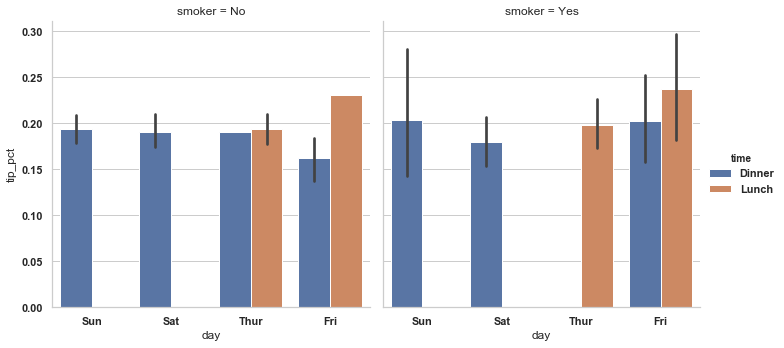

In [61]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

seabornのcatplot(旧名factorplot)関数を使うことで、さまざまなファセットプロットを簡単に作ることができる  
上では、キーワード引数のcolに"smoker"を渡して、smoker列がyesの場合とnoの場合で分けて図にプロットしている

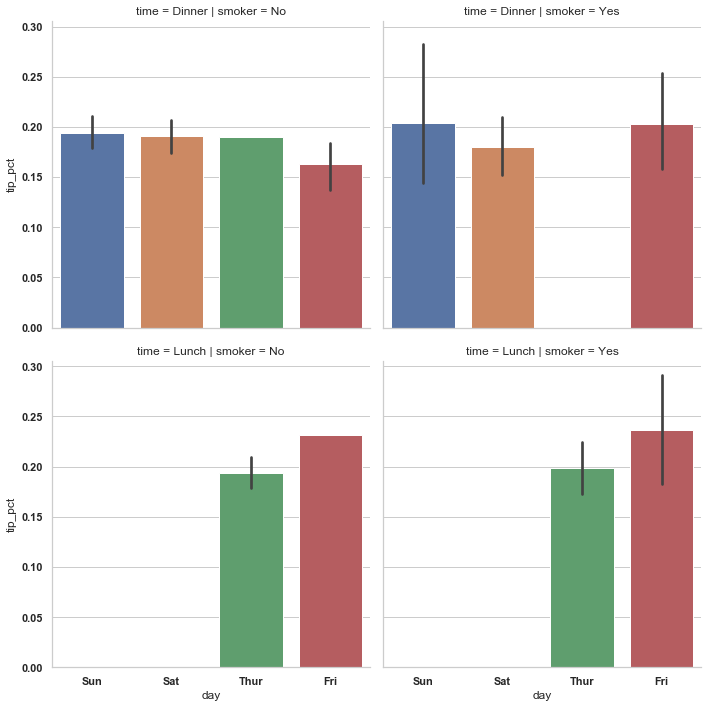

In [62]:
sns.catplot(x="day", y="tip_pct", row="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

上ではキーワード引数のrowに"time"を渡してtime列の要素でも図を分けて、別のサブプロットの行に図を追加し表示している

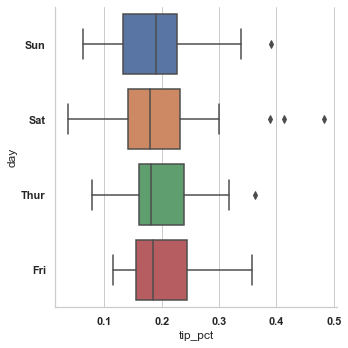

In [63]:
sns.catplot(x="tip_pct", y="day", kind="box", data=tips[tips.tip_pct < 0.5])

表示しようとしているデータの内容によっては棒グラフのほうがいい時もあり、キーワード引数のkindに他のプロット形式(上ではbox)を渡すことで指定することができる

# 9.3  その他のPython用可視化ツール

オープンソースの世界ではよくあることだが、Pythonで画像を作成する場合、選択肢が多すぎる  
BokehやPlotlyなどのツールを用いて、Pythonでウェブブラウザ向けに動的、対話的に操作できる画像を作成することが可能になっている  
印刷用やウェブ用の静的な画像を作成する場合、まずデフォルトとしてMatplotlibを使い、必要に応じてpnadasやseabornのようなアドオンライブラリを使うようにするとよい  